# Import Data & Python Packages 

In [1]:
# Import python packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn import model_selection

In [2]:
# Import dataset
df = pd.read_csv('data_ending_test.csv')

In [3]:
df.head()

,uid,gender,age,cluster_name,partner_name,status_outlet,is_complete,first_trx_date,last_trx_date,in_six_months,active_months,total_gmv,total_trx,source_trx,status_lending
0,481,1,33,Indragiri,Lapak Kita,Active,1,2017-04-28,2018-08-01,YES,16.0,34632558.0,1035.0,Android 2.3.6,2
1,506,1,27,Indragiri,Lapak Kita,Active,0,2017-03-09,2018-08-01,YES,17.0,26438676.0,884.0,Android 2.3.6,2
2,679,2,27,Indragiri,Lapak Kita,Active,1,2017-08-03,2018-08-01,YES,12.0,34262450.0,1310.0,Android 2.3.6,1
3,921,2,29,Indragiri,Lapak Kita,Active,1,2016-09-07,2018-08-01,YES,23.0,90686330.0,3903.0,Android 2.3.6,1
4,970,1,34,Indragiri,Lapak Kita,Active,1,2017-08-18,2018-08-02,YES,12.0,61209199.0,3435.0,Android 2.3.6,1


In [4]:
# Compositional dataset 
print 'lending_YES = {}'.format(len(df[df['status_lending'] == 1]))  
print 'lending_NO = {}'.format(len(df[df['status_lending'] == 2]))

lending_YES = 30
lending_NO = 35


In [5]:
 # Columns in dataset
df.columns.tolist()

['uid',
 'gender',
 'age',
 'cluster_name',
 'partner_name',
 'status_outlet',
 'is_complete',
 'first_trx_date',
 'last_trx_date',
 'in_six_months',
 'active_months',
 'total_gmv',
 'total_trx',
 'source_trx',
 'status_lending']

# Data Prepocessing

## Check Missing Values 

In [6]:
# Checking missing values in dataset
df.isnull().sum()

uid                0
gender             0
age                0
cluster_name      10
partner_name      10
status_outlet     10
is_complete        0
first_trx_date     2
last_trx_date      2
in_six_months      2
active_months      2
total_gmv          2
total_trx          2
source_trx         3
status_lending     0
dtype: int64

Checking rows where the 'total_gmv' == Null

In [7]:
df[df['total_gmv'].isnull()]

,uid,gender,age,cluster_name,partner_name,status_outlet,is_complete,first_trx_date,last_trx_date,in_six_months,active_months,total_gmv,total_trx,source_trx,status_lending
38,21882,1,25,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
64,32498,1,10,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Deleting row with uid '21882' and '21882' because these uids are dummy data

In [8]:
df = df[df.uid != 21882]
df = df[df.uid != 32498]

### cluster_name - Missing values

In [9]:
# Checking unique value 
df['cluster_name'].unique()

array(['Indragiri', nan, 'Banyumas', 'Cilacap', 'Tegal', 'Tanah Abang',
       'Bangkalan', 'Menteng'], dtype=object)

In [10]:
# Filling missing value with 'Others'
df.cluster_name = df.cluster_name.fillna('Others')
df['cluster_name'].unique()

array(['Indragiri', 'Others', 'Banyumas', 'Cilacap', 'Tegal',
       'Tanah Abang', 'Bangkalan', 'Menteng'], dtype=object)

### partner_name - Missing values

In [11]:
# Checking unique value
df['partner_name'].unique()

# Filling missing value
df.partner_name = df.partner_name.fillna('Others')

### status_outlet - Missing values

In [12]:
# Checking unique value
df['status_outlet'].unique()

# Filling missing value
df.status_outlet = df.status_outlet.fillna('Not Active')

### source_trx - Missing values

In [14]:
# Checking unique value
df['source_trx'].unique()

# Filling missing value
df.source_trx = df.source_trx.fillna('Others')

In [15]:
# Checking missing values in dataset
df.isnull().sum()

uid               0
gender            0
age               0
cluster_name      0
partner_name      0
status_outlet     0
is_complete       0
first_trx_date    0
last_trx_date     0
in_six_months     0
active_months     0
total_gmv         0
total_trx         0
source_trx        0
status_lending    0
dtype: int64

-- Compositional dataset --

In [16]:
print 'lending_YES = {}'.format(len(df[df['status_lending'] == 1]))  
print 'lending_NO = {}'.format(len(df[df['status_lending'] == 2]))

lending_YES = 29
lending_NO = 34


In [78]:
# Make copy of dataset 
data = df.copy()

## Data Analysis

In [79]:
data.describe()

,uid,gender,age,is_complete,active_months,total_gmv,total_trx,status_lending
count,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000,63.000000
mean,11602.253968,1.396825,31.349206,0.730159,13.047619,5.445279e+07,2094.555556,1.539683
std,11157.793116,0.493169,6.611717,0.447443,5.976914,6.551883e+07,3045.555899,0.502426
min,481.000000,1.000000,21.000000,0.000000,2.000000,1.139755e+06,62.000000,1.000000
25%,1668.000000,1.000000,26.000000,0.000000,8.500000,1.703314e+07,631.000000,1.000000
50%,4111.000000,1.000000,31.000000,1.000000,11.000000,3.463256e+07,1249.000000,2.000000
75%,23490.000000,2.000000,35.000000,1.000000,18.500000,6.124296e+07,2170.500000,2.000000
max,29829.000000,2.000000,56.000000,1.000000,23.000000,3.543610e+08,19202.000000,2.000000


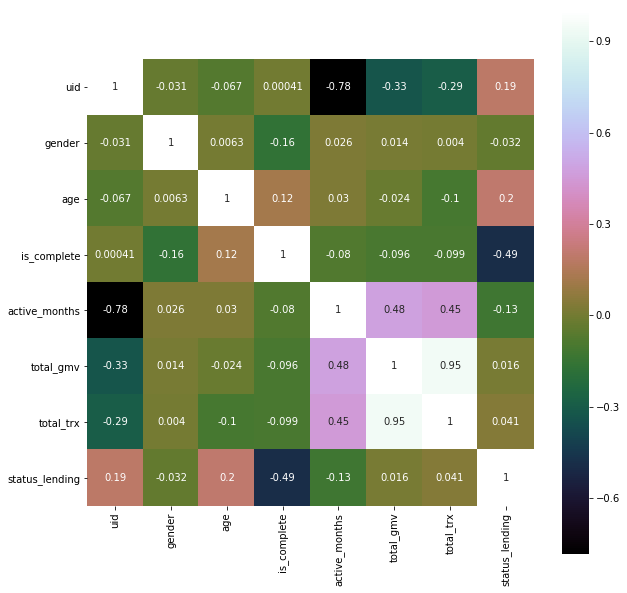

In [80]:
# Correlation heatmap in dataset
correlation = data.corr()  
plt.figure(figsize=(10, 10))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

From the above heatmap, 'is_complete' has higher correlation value to 'status_lending'

### gender vs status_lending

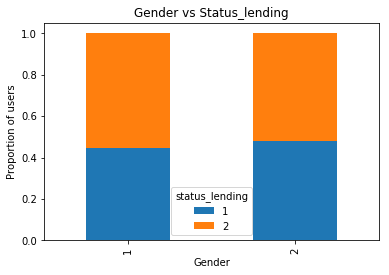

In [81]:
input_dt = pd.crosstab(data.gender,data.status_lending)
input_dt.div(input_dt.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Gender vs Status_lending')
plt.xlabel('Gender')
plt.ylabel('Proportion of users')
plt.savefig('Gender vs Status_lending')

In [82]:
data.groupby(['status_lending', 'gender'])['gender'].count()

status_lending  gender
1               1         17
                2         12
2               1         21
                2         13
Name: gender, dtype: int64

Conclusion : Gender might not be a good predictor

### age vs status_lending

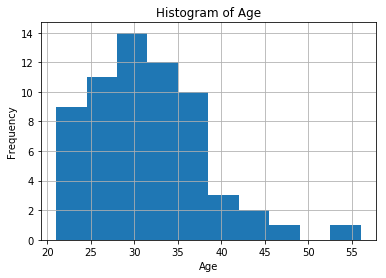

In [83]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [84]:
data.groupby(['status_lending'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
status_lending,,,,,,,,
1,29.0,29.931034,4.682269,22.0,26.00,30.0,33.0,40.0
2,34.0,32.558824,7.762346,21.0,26.25,32.5,36.0,56.0


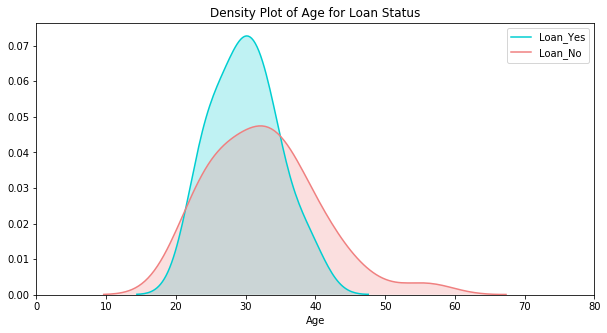

In [85]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data["age"][data.status_lending == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["age"][data.status_lending == 2], color="lightcoral", shade=True)
plt.legend(['Loan_Yes', 'Loan_No'])
plt.title('Density Plot of Age for Loan Status')
ax.set(xlabel='Age')
plt.xlim(0,80)
plt.show()

 Add another categorical variable in dataset: "good_age"

In [86]:
data['is_good_age']=np.where((data['age']>=23) & (data['age']<=35), 1, 0)

### partner_name vs status_lending

In [236]:
#sns.countplot(x="status_lending", hue="partner_name", data=data)

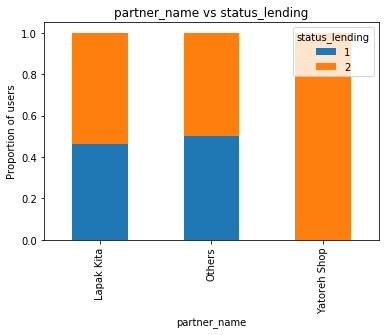

In [87]:
input_dt=pd.crosstab(data.partner_name,data.status_lending)
input_dt.div(input_dt.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('partner_name vs status_lending')
plt.xlabel('partner_name')
plt.ylabel('Proportion of users')
plt.savefig('partner_name vs Status_lending')

### status_outlet vs status_lending

In [88]:
data['status_outlet'].unique()

array(['Active', 'Not Active'], dtype=object)

In [239]:
#sns.countplot(x="status_lending", hue="status_outlet", data=data)

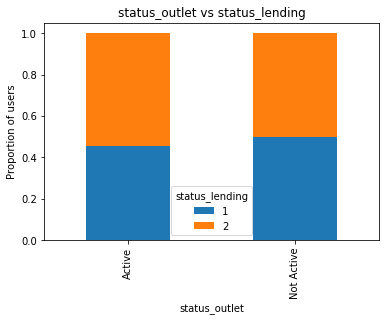

In [89]:
input_dt=pd.crosstab(data.status_outlet,data.status_lending)
input_dt.div(input_dt.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('status_outlet vs status_lending')
plt.xlabel('status_outlet')
plt.ylabel('Proportion of users')
plt.savefig('status_outlet vs Status_lending')

Conclusion : Not good predictor

### is_complete vs status_lending

In [241]:
#sns.countplot(x="status_lending", hue="is_complete", data=data)

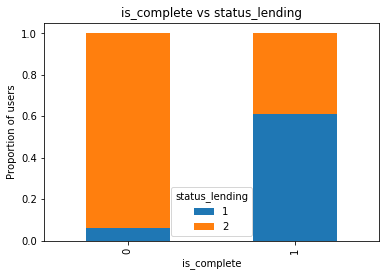

In [90]:
input_dt=pd.crosstab(data.is_complete,data.status_lending)
input_dt.div(input_dt.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('is_complete vs status_lending')
plt.xlabel('is_complete')
plt.ylabel('Proportion of users')
plt.savefig('is_complete vs Status_lending')

Conclusion : 'is_complete' might be good predictor

### in_six_months vs status_lending

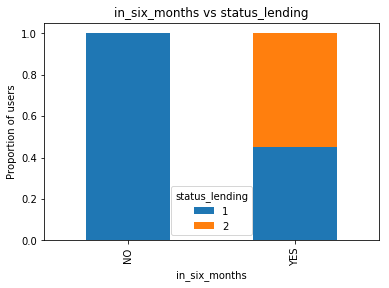

In [91]:
input_dt=pd.crosstab(data.in_six_months,data.status_lending)
input_dt.div(input_dt.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('in_six_months vs status_lending')
plt.xlabel('in_six_months')
plt.ylabel('Proportion of users')
plt.savefig('in_six_months vs Status_lending')

### active_months vs status_lending

In [92]:
data.groupby(['status_lending'])['active_months'].describe()

,count,mean,std,min,25%,50%,75%,max
status_lending,,,,,,,,
1,29.0,13.862069,5.724160,4.0,10.0,12.0,20.0,23.0
2,34.0,12.352941,6.183469,2.0,8.0,10.0,17.0,23.0


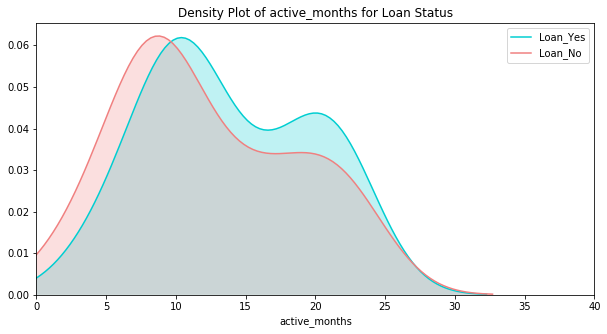

In [93]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data["active_months"][data.status_lending == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["active_months"][data.status_lending == 2], color="lightcoral", shade=True)
plt.legend(['Loan_Yes', 'Loan_No'])
plt.title('Density Plot of active_months for Loan Status')
ax.set(xlabel='active_months')
plt.xlim(0,40)
plt.show()

In [94]:
data['is_loyal_member']=np.where((data['active_months']>=10), 1, 0)

### total_gmv vs status_lending

In [95]:
data.groupby(['status_lending'])['total_gmv'].describe()

,count,mean,std,min,25%,50%,75%,max
status_lending,,,,,,,,
1,29.0,5.330571e+07,6.145994e+07,5834300.0,20746222.0,38246689.0,61209199.00,313818037.0
2,34.0,5.543118e+07,6.969907e+07,1139755.0,13314741.5,26568122.5,67630760.25,354361015.0


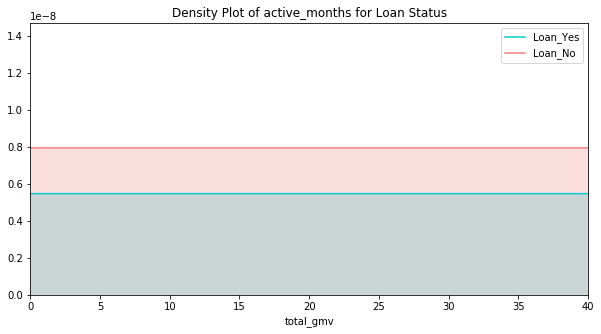

In [39]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data["total_gmv"][data.status_lending == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["total_gmv"][data.status_lending == 2], color="lightcoral", shade=True)
plt.legend(['Loan_Yes', 'Loan_No'])
plt.title('Density Plot of active_months for Loan Status')
ax.set(xlabel='total_gmv')
plt.xlim(0,40)
plt.show()

In [96]:
#data.loc[data['total_gmv'].idxmax()]
data['total_gmv'].max()
data['total_gmv'].min()

1139755.0

### total_trx vs status_lending

In [97]:
data.groupby(['status_lending'])['total_trx'].describe()

,count,mean,std,min,25%,50%,75%,max
status_lending,,,,,,,,
1,29.0,1961.724138,2501.483930,113.0,774.00,1396.0,2067.00,13513.0
2,34.0,2207.852941,3476.847833,62.0,513.75,1031.0,2218.25,19202.0


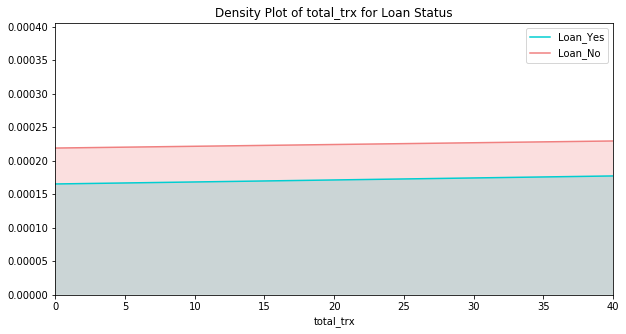

In [98]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data["total_trx"][data.status_lending == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["total_trx"][data.status_lending == 2], color="lightcoral", shade=True)
plt.legend(['Loan_Yes', 'Loan_No'])
plt.title('Density Plot of total_trx for Loan Status')
ax.set(xlabel='total_trx')
plt.xlim(0,40)
plt.show()

### source_trx vs status_lending

In [99]:
data['source_trx'].unique()

array(['Android 2.3.6', 'Others', 'Android 2.3.5', 'Android 2.3.4',
       'Android 2.3.8', 'Android 2.3.7'], dtype=object)

Change value 'Android 2.3.6', 'Android 2.3.5', 'Android 2.3.4', 'Android 2.3.8', 'Android 2.3.7' to 'Android'

In [100]:
data['source_trx']=np.where(data['source_trx'] =='Android 2.3.6', 'Android', data['source_trx'])
data['source_trx']=np.where(data['source_trx'] =='Android 2.3.5', 'Android', data['source_trx'])
data['source_trx']=np.where(data['source_trx'] =='Android 2.3.4', 'Android', data['source_trx'])
data['source_trx']=np.where(data['source_trx'] =='Android 2.3.8', 'Android', data['source_trx'])
data['source_trx']=np.where(data['source_trx'] =='Android 2.3.7', 'Android', data['source_trx'])

In [101]:
data['source_trx'].unique()

array(['Android', 'Others'], dtype=object)

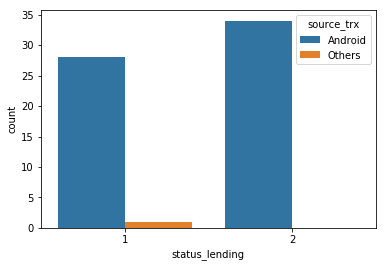

In [102]:
sns.countplot(x="status_lending", hue="source_trx", data=data)

## Create dummy variables

Create categorical variables and drop some variables

In [103]:
data.head()

,uid,gender,age,cluster_name,partner_name,status_outlet,is_complete,first_trx_date,last_trx_date,in_six_months,active_months,total_gmv,total_trx,source_trx,status_lending,is_good_age,is_loyal_member
0,481,1,33,Indragiri,Lapak Kita,Active,1,2017-04-28,2018-08-01,YES,16.0,34632558.0,1035.0,Android,2,1,1
1,506,1,27,Indragiri,Lapak Kita,Active,0,2017-03-09,2018-08-01,YES,17.0,26438676.0,884.0,Android,2,1,1
2,679,2,27,Indragiri,Lapak Kita,Active,1,2017-08-03,2018-08-01,YES,12.0,34262450.0,1310.0,Android,1,1,1
3,921,2,29,Indragiri,Lapak Kita,Active,1,2016-09-07,2018-08-01,YES,23.0,90686330.0,3903.0,Android,1,1,1
4,970,1,34,Indragiri,Lapak Kita,Active,1,2017-08-18,2018-08-02,YES,12.0,61209199.0,3435.0,Android,1,1,1


In [104]:
dataframe1 = data.copy()

 Create categorical variables for 'gender','status_outlet','in_six_months','source_trx','status_lending'

In [105]:
dataframe1 = pd.get_dummies(dataframe1, columns=['gender','status_outlet','in_six_months','source_trx', 'status_lending'])

In [106]:
dataframe1.head()

,uid,age,cluster_name,partner_name,is_complete,first_trx_date,last_trx_date,active_months,total_gmv,total_trx,...,gender_1,gender_2,status_outlet_Active,status_outlet_Not Active,in_six_months_NO,in_six_months_YES,source_trx_Android,source_trx_Others,status_lending_1,status_lending_2
0,481,33,Indragiri,Lapak Kita,1,2017-04-28,2018-08-01,16.0,34632558.0,1035.0,...,1,0,1,0,0,1,1,0,0,1
1,506,27,Indragiri,Lapak Kita,0,2017-03-09,2018-08-01,17.0,26438676.0,884.0,...,1,0,1,0,0,1,1,0,0,1
2,679,27,Indragiri,Lapak Kita,1,2017-08-03,2018-08-01,12.0,34262450.0,1310.0,...,0,1,1,0,0,1,1,0,1,0
3,921,29,Indragiri,Lapak Kita,1,2016-09-07,2018-08-01,23.0,90686330.0,3903.0,...,0,1,1,0,0,1,1,0,1,0
4,970,34,Indragiri,Lapak Kita,1,2017-08-18,2018-08-02,12.0,61209199.0,3435.0,...,1,0,1,0,0,1,1,0,1,0


Drop unnecessary columns 

In [107]:
dataframe1 = dataframe1.drop(['uid','cluster_name','partner_name','first_trx_date', 'last_trx_date','gender_2', 'status_outlet_Not Active','in_six_months_NO', 'source_trx_Others','status_lending_2'] , 1)

In [108]:
dataframe1.head()

,age,is_complete,active_months,total_gmv,total_trx,is_good_age,is_loyal_member,gender_1,status_outlet_Active,in_six_months_YES,source_trx_Android,status_lending_1
0,33,1,16.0,34632558.0,1035.0,1,1,1,1,1,1,0
1,27,0,17.0,26438676.0,884.0,1,1,1,1,1,1,0
2,27,1,12.0,34262450.0,1310.0,1,1,0,1,1,1,1
3,29,1,23.0,90686330.0,3903.0,1,1,0,1,1,1,1
4,34,1,12.0,61209199.0,3435.0,1,1,1,1,1,1,1


Rename cols 'gender_1' to 'is_male' and 'status_lending_1' to 'status_lending'

In [109]:
dataframe1=dataframe1.rename(columns = {'gender_1':'is_male', 'status_lending_1':'status_lending'})

In [110]:
dataframe1.head()

,age,is_complete,active_months,total_gmv,total_trx,is_good_age,is_loyal_member,is_male,status_outlet_Active,in_six_months_YES,source_trx_Android,status_lending
0,33,1,16.0,34632558.0,1035.0,1,1,1,1,1,1,0
1,27,0,17.0,26438676.0,884.0,1,1,1,1,1,1,0
2,27,1,12.0,34262450.0,1310.0,1,1,0,1,1,1,1
3,29,1,23.0,90686330.0,3903.0,1,1,0,1,1,1,1
4,34,1,12.0,61209199.0,3435.0,1,1,1,1,1,1,1


In [111]:
train_data = dataframe1.copy()

# Logistic Regression 

## Feature Selection

In [112]:
from sklearn.feature_selection import RFE

In [127]:
cols = train_data.columns.values.tolist()
y = ['status_lending']
X=[i for i in cols if i not in y]

In [128]:
# Build a model and select 8 attributes
LR_model = LogisticRegression()
rfe = RFE(LR_model, 8)
rfe = rfe.fit(train_data[X], train_data[y])
selected_features = list(train_data[X].columns[rfe.support_])

print selected_features

['age', 'is_complete', 'total_gmv', 'total_trx', 'is_good_age', 'is_loyal_member', 'in_six_months_YES', 'source_trx_Android']


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
#!pip install statsmodels

### Checking p-value

Define X and y 

In [170]:
X = dataframe1[selected_features]
y = dataframe1['status_lending']

p-value : Below 0.05, significant. Over 0.05, not significant

In [168]:
import statsmodels.api as sm

In [171]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         status_lending   No. Observations:                   63
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Aug 2018   Pseudo R-squ.:                     inf
Time:                        16:39:00   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   -0.1352      0.057     -2.376      0.018      -0.247      -0.024
is_complet

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Conclusion : Bad data

## Model Evaluation

### Model Fitting

In [132]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))

LogisticRegression accuracy is 0.385


In [164]:
logit_model = logreg.fit(X_train, y_train)  
logreg.score(X_train, y_train)  

predicted = pd.DataFrame(logit_model.predict(X_test))  

probs = pd.DataFrame(logit_model.predict_proba(X_test))  
print metrics.accuracy_score(y_test, predicted)   

0.38461538461538464


In [139]:
print('Accuracy LR on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy LR on test set: 0.38


In [140]:
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(logreg, X, y, cv=10, scoring=list(scoring.values()), return_train_score=False)

for sc in range(len(scoring)):
    print(logreg.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

LogisticRegression average log_loss: 0.698 (+/-0.009)
LogisticRegression average auc: 0.375 (+/-0.146)
LogisticRegression average accuracy: 0.524 (+/-0.050)


## Cross Validation

In [141]:
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.483


## Confusion Matrix

In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
print confusion_matrix(y_test, y_pred)

[[0 8]
 [0 5]]


Result: 5 correct predictions and 8 incorrect predictions.

## Precision, Recall, F-measure 

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.38      1.00      0.56         5

avg / total       0.15      0.38      0.21        13



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
